In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import time
import json
import seaborn as sns
from numpy import array
from random import random
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
netflow_data = pd.read_csv('/content/nfcapd202109040450.csv', usecols=['sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt'])

In [ ]:
netflow_data.head(n=20)

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
0,44.142.155.95,44.149.16.132,52632,43434.0,TCP,2.0,118.0,0.0,0.0
1,44.142.21.12,44.225.42.182,49704,43434.0,TCP,2.0,118.0,0.0,0.0
2,44.149.20.136,44.149.16.132,46146,43434.0,TCP,3.0,177.0,0.0,0.0
3,44.149.97.133,44.149.43.132,4520,4520.0,UDP,1.0,36.0,0.0,0.0
4,44.149.43.132,44.149.97.133,4520,4520.0,UDP,1.0,36.0,0.0,0.0
5,44.149.16.139,44.225.41.134,35964,81.0,TCP,1.0,60.0,0.0,0.0
6,44.225.41.134,44.149.16.139,81,35964.0,TCP,1.0,40.0,0.0,0.0
7,44.148.20.54,255.255.255.255,5678,5678.0,UDP,1.0,159.0,0.0,0.0
8,44.149.16.139,44.225.41.134,51476,8080.0,TCP,1.0,60.0,0.0,0.0
9,44.225.41.134,44.149.16.139,8080,51476.0,TCP,1.0,40.0,0.0,0.0


In [ ]:
netflow_data.count()

sa      2769
da      2769
sp      2769
dp      2767
pr      2767
ipkt    2767
ibyt    2767
opkt    2767
obyt    2767
dtype: int64

In [ ]:
netflow_data.dtypes

sa       object
da       object
sp       object
dp      float64
pr       object
ipkt    float64
ibyt    float64
opkt    float64
obyt    float64
dtype: object

In [ ]:
netflow_data.dp.nunique()

579

In [ ]:
hostclasses = {'44.149.43.129': 'Mikrotik_BGP_Router','44.149.43.130': 'Mikrotik_Router','44.149.43.131': 'Mikrotik_Router','44.149.43.132': 'Linux_Ubuntu','44.149.43.134': 'Linux_Raspbian','44.149.43.136': 'Linux_Ubuntu','44.149.43.193': 'Mikrotik_BGP_Router','44.149.43.194': 'Mikrotik_Radio','44.149.43.195': 'Mikrotik_Radio','44.149.43.196': 'Mikrotik_Router','44.149.43.197': 'SDR_RedPitaya','44.149.43.198': 'Linux_Raspbian','44.149.43.199': 'Linux_Debian','44.149.43.200': 'Mikrotik_Router','44.149.43.202': 'SDR_RedPitaya','44.149.43.203': 'VOIP','44.149.43.204': 'Linux_Ubuntu','44.149.43.206': 'SDR_RedPitaya','44.149.43.207': 'Linux_Ubuntu','44.149.43.208': 'Linux_Debian','44.149.43.209': 'Linux_Ubuntu','44.149.43.210': 'Windows','44.149.43.211': 'SDR_Red_Pitaya','44.149.43.213': 'SDR_RedPitaya' , '255.255.255.255': 'router_user_db0pas',
 '44.143.111.17': 'Ink_0e5xhr_db0pas',
 '44.143.111.18': 'router_db0pas',
 '44.143.111.27': 'Ink_0e5xhr_db0pas',
 '44.143.111.28': 'router_db0pas',
 '44.148.20.57': 'router_db0tvp',
 '44.148.20.58': 'bb_db0hup_db0tvp',
 '44.148.20.60': 'router_roof_db0hup',
 '44.148.20.62': 'router_db0tvp',
 '44.149.43.131': 'powerboxPAS',
 '44.149.43.161': 'router_db0pas',
 '44.224.20.45': 'MikroTik',
 '44.224.20.46': 'router_db0pas',
 '44.224.20.49': 'router_db0pas',
 '44.224.20.50': 'Ink_db0hup_db0pas',
 '44.225.43.129': 'router_db0pas',
 '44.225.43.193': 'router_db0tvp',
 '44.225.43.194': 'bb_dl0pf_dbotvp',
 '44.225.43.209': 'router_db0tvp',
 '44.225.43.210': 'user_db0tvp'}

In [ ]:
new_netflow = netflow_data.dropna()

In [ ]:
new_netflow.shape

(2767, 9)

In [ ]:
new_netflow.pr.unique()

array(['TCP', 'UDP', 'ICMP', 'GRE'], dtype=object)

In [ ]:
le = LabelEncoder()
new_netflow.pr = le.fit_transform(new_netflow.pr)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
new_netflow.head(n=20)

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
0,44.142.155.95,44.149.16.132,52632,43434.0,2,2.0,118.0,0.0,0.0
1,44.142.21.12,44.225.42.182,49704,43434.0,2,2.0,118.0,0.0,0.0
2,44.149.20.136,44.149.16.132,46146,43434.0,2,3.0,177.0,0.0,0.0
3,44.149.97.133,44.149.43.132,4520,4520.0,3,1.0,36.0,0.0,0.0
4,44.149.43.132,44.149.97.133,4520,4520.0,3,1.0,36.0,0.0,0.0
5,44.149.16.139,44.225.41.134,35964,81.0,2,1.0,60.0,0.0,0.0
6,44.225.41.134,44.149.16.139,81,35964.0,2,1.0,40.0,0.0,0.0
7,44.148.20.54,255.255.255.255,5678,5678.0,3,1.0,159.0,0.0,0.0
8,44.149.16.139,44.225.41.134,51476,8080.0,2,1.0,60.0,0.0,0.0
9,44.225.41.134,44.149.16.139,8080,51476.0,2,1.0,40.0,0.0,0.0


In [ ]:
row = 0
for i in new_netflow["dp"]:
  if int(i) >= 0 and int(i) <= 1023:
     new_netflow.at[row,"dp"] = 1
  elif int(i) >= 1024 and int(i) <= 32767:
      new_netflow.at[row,"dp"] = 2
  elif int(i) >= 32768 and int(i) <= 65535:
      new_netflow.at[row,"dp"] = 3
  else:
      new_netflow.at[row,"dp"] = 0
  row+=1

In [ ]:
row = 0
for i in new_netflow["sp"]:
  if int(i) >= 0 and int(i) <= 1023:
     new_netflow.at[row,"sp"] = 1
  elif int(i) >= 1024 and int(i) <= 32767:
      new_netflow.at[row,"sp"] = 2
  elif int(i) >= 32768 and int(i) <= 65535:
      new_netflow.at[row,"sp"] = 3
  else:
      new_netflow.at[row,"sp"] = 0
  row+=1

In [ ]:
new_netflow.head(n=20)

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
0,44.142.155.95,44.149.16.132,3,3.0,2,2.0,118.0,0.0,0.0
1,44.142.21.12,44.225.42.182,3,3.0,2,2.0,118.0,0.0,0.0
2,44.149.20.136,44.149.16.132,3,3.0,2,3.0,177.0,0.0,0.0
3,44.149.97.133,44.149.43.132,2,2.0,3,1.0,36.0,0.0,0.0
4,44.149.43.132,44.149.97.133,2,2.0,3,1.0,36.0,0.0,0.0
5,44.149.16.139,44.225.41.134,3,1.0,2,1.0,60.0,0.0,0.0
6,44.225.41.134,44.149.16.139,1,3.0,2,1.0,40.0,0.0,0.0
7,44.148.20.54,255.255.255.255,2,2.0,3,1.0,159.0,0.0,0.0
8,44.149.16.139,44.225.41.134,3,2.0,2,1.0,60.0,0.0,0.0
9,44.225.41.134,44.149.16.139,2,3.0,2,1.0,40.0,0.0,0.0


In [ ]:
# pcap_json = open('/content/lldp-202109040451.json', 'r')
# pcap_data = pcap_json.read()
# obj = json.loads(pcap_data)

In [ ]:
# pcap_json

In [ ]:
# obj

In [ ]:
with open ('/content/lldp-202109040451.json', 'r', encoding='utf-8') as f:
     data = json.loads(f.read())
df = pd.json_normalize(data)

In [ ]:
data

[{'_index': 'packets-2021-09-04',
  '_score': None,
  '_source': {'layers': {'eth': {'eth.dst': '01:80:c2:00:00:0e',
     'eth.dst_tree': {'eth.addr': '01:80:c2:00:00:0e',
      'eth.addr.oui': '98498',
      'eth.addr_resolved': 'LLDP_Multicast',
      'eth.dst.ig': '1',
      'eth.dst.lg': '0',
      'eth.dst.oui': '98498',
      'eth.dst_resolved': 'LLDP_Multicast',
      'eth.ig': '1',
      'eth.lg': '0'},
     'eth.src': '64:d1:54:0c:16:75',
     'eth.src_tree': {'eth.addr': '64:d1:54:0c:16:75',
      'eth.addr.oui': '6607188',
      'eth.addr.oui_resolved': 'Routerboard.com',
      'eth.addr_resolved': 'Routerbo_0c:16:75',
      'eth.ig': '0',
      'eth.lg': '0',
      'eth.src.ig': '0',
      'eth.src.lg': '0',
      'eth.src.oui': '6607188',
      'eth.src.oui_resolved': 'Routerboard.com',
      'eth.src_resolved': 'Routerbo_0c:16:75'},
     'eth.trailer': '1c:00:00',
     'eth.type': '0x000088cc'},
    'frame': {'frame.cap_len': '131',
     'frame.coloring_rule.name': 'Broad

In [ ]:
df.head()

,_index,_type,_score,_source.layers.frame.frame.encap_type,_source.layers.frame.frame.time,_source.layers.frame.frame.offset_shift,_source.layers.frame.frame.time_epoch,_source.layers.frame.frame.time_delta,_source.layers.frame.frame.time_delta_displayed,_source.layers.frame.frame.time_relative,_source.layers.frame.frame.number,_source.layers.frame.frame.len,_source.layers.frame.frame.cap_len,_source.layers.frame.frame.marked,_source.layers.frame.frame.ignored,_source.layers.frame.frame.protocols,_source.layers.frame.frame.coloring_rule.name,_source.layers.frame.frame.coloring_rule.string,_source.layers.eth.eth.dst,_source.layers.eth.eth.dst_tree.eth.dst_resolved,_source.layers.eth.eth.dst_tree.eth.dst.oui,_source.layers.eth.eth.dst_tree.eth.addr,_source.layers.eth.eth.dst_tree.eth.addr_resolved,_source.layers.eth.eth.dst_tree.eth.addr.oui,_source.layers.eth.eth.dst_tree.eth.dst.lg,_source.layers.eth.eth.dst_tree.eth.lg,_source.layers.eth.eth.dst_tree.eth.dst.ig,_source.layers.eth.eth.dst_tree.eth.ig,_source.layers.eth.eth.src,_source.layers.eth.eth.src_tree.eth.src_resolved,_source.layers.eth.eth.src_tree.eth.src.oui,_source.layers.eth.eth.src_tree.eth.src.oui_resolved,_source.layers.eth.eth.src_tree.eth.addr,_source.layers.eth.eth.src_tree.eth.addr_resolved,_source.layers.eth.eth.src_tree.eth.addr.oui,_source.layers.eth.eth.src_tree.eth.addr.oui_resolved,_source.layers.eth.eth.src_tree.eth.src.lg,_source.layers.eth.eth.src_tree.eth.lg,_source.layers.eth.eth.src_tree.eth.src.ig,_source.layers.eth.eth.src_tree.eth.ig,...,"_source.layers.lldp.Chassis Subtype = MAC address, Id: 02:57:5f:cf:1b:3f.lldp.chassis.subtype","_source.layers.lldp.Chassis Subtype = MAC address, Id: 02:57:5f:cf:1b:3f.lldp.chassis.id.mac","_source.layers.lldp.Port Subtype = Interface name, Id: bridge-sitepas/ether1.lldp.tlv.type","_source.layers.lldp.Port Subtype = Interface name, Id: bridge-sitepas/ether1.lldp.tlv.len","_source.layers.lldp.Port Subtype = Interface name, Id: bridge-sitepas/ether1.lldp.port.subtype","_source.layers.lldp.Port Subtype = Interface name, Id: bridge-sitepas/ether1.lldp.port.id",_source.layers.lldp.System Name = PowerboxPAS.lldp.tlv.type,_source.layers.lldp.System Name = PowerboxPAS.lldp.tlv.len,_source.layers.lldp.System Name = PowerboxPAS.lldp.tlv.system.name,_source.layers.lldp.System Description = MikroTik RouterOS 6.48.1 (stable) RB750Pr2.lldp.tlv.type,_source.layers.lldp.System Description = MikroTik RouterOS 6.48.1 (stable) RB750Pr2.lldp.tlv.len,_source.layers.lldp.System Description = MikroTik RouterOS 6.48.1 (stable) RB750Pr2.lldp.tlv.system.desc,"_source.layers.lldp.Port Subtype = Interface name, Id: EoIP-Sitenetz-Powerbridge.lldp.tlv.type","_source.layers.lldp.Port Subtype = Interface name, Id: EoIP-Sitenetz-Powerbridge.lldp.tlv.len","_source.layers.lldp.Port Subtype = Interface name, Id: EoIP-Sitenetz-Powerbridge.lldp.port.subtype","_source.layers.lldp.Port Subtype = Interface name, Id: EoIP-Sitenetz-Powerbridge.lldp.port.id","_source.layers.lldp.Chassis Subtype = MAC address, Id: 4c:5e:0c:8c:d3:3c.lldp.tlv.type","_source.layers.lldp.Chassis Subtype = MAC address, Id: 4c:5e:0c:8c:d3:3c.lldp.tlv.len","_source.layers.lldp.Chassis Subtype = MAC address, Id: 4c:5e:0c:8c:d3:3c.lldp.chassis.subtype","_source.layers.lldp.Chassis Subtype = MAC address, Id: 4c:5e:0c:8c:d3:3c.lldp.chassis.id.mac",_source.layers.lldp.System Name = lnk-db0hup.db0pas.lldp.tlv.type,_source.layers.lldp.System Name = lnk-db0hup.db0pas.lldp.tlv.len,_source.layers.lldp.System Name = lnk-db0hup.db0pas.lldp.tlv.system.name,_source.layers.lldp.System Description = MikroTik RouterOS 6.43.4 (stable) RB911G-5HPnD.lldp.tlv.type,_source.layers.lldp.System Description = MikroTik RouterOS 6.43.4 (stable) RB911G-5HPnD.lldp.tlv.len,_source.layers.lldp.System Description = MikroTik RouterOS 6.43.4 (stable) RB911G-5HPnD.lldp.tlv.system.desc,"_source.layers.lldp.Chassis Subtype = MAC address, Id: d4:ca:6d:c0:50:b0.lldp.tlv.type","_source.layers.lldp.Chassis Subtype = 

In [ ]:
pcap_modified = pd.read_csv('/content/Pcap_modified.csv')
pcap_modified.head(n=20)

,_index,Time,Source,Destination,Protocol,Length,Mac_addr,Src_Ip,Sys_Name,Info
0,packets-2021-09-04,0.000000,Routerbo_0c:16:75,LLDP_Multicast,LLDP,131,64:d1:54:0c:16:75,44.224.20.45,MikroTik,MA/64:d1:54:0c:16:75 IN/bridge1 120 SysN=Mikro...
1,packets-2021-09-04,1.157094,Routerbo_8f:4c:ce,LLDP_Multicast,LLDP,131,4c:5e:0c:8f:4c:ce,44.143.111.17,Ink_oe5xhr,MA/4c:5e:0c:8f:4c:ce IN/bridge-local 120 SysN=...
2,packets-2021-09-04,1.288340,Routerbo_c7:b5:2f,LLDP_Multicast,LLDP,146,00:0c:42:c7:b5:2f,44.225.43.129,router_db0pas,MA/00:0c:42:c7:b5:2f IN/Sitenet/ether1-sitenet...
3,packets-2021-09-04,1.288653,Routerbo_c7:b5:30,LLDP_Multicast,LLDP,124,00:0c:42:c7:b5:30,44.143.111.28,router_db0pas,MA/00:0c:42:c7:b5:30 IN/ether2-pas-xhr 120 Sys...
4,packets-2021-09-04,1.288749,Routerbo_c7:b5:31,LLDP_Multicast,LLDP,138,00:0c:42:c7:b5:31,44.224.20.49,router_db0pas,MA/00:0c:42:c7:b5:31 IN/ether3-pas-tvp 120 Sys...
5,packets-2021-09-04,1.288997,Routerbo_c7:b5:32,LLDP_Multicast,LLDP,137,00:0c:42:c7:b5:32,44.224.20.46,router_db0pas,MA/00:0c:42:c7:b5:32 IN/ether4-pas-sl 120 SysN...
6,packets-2021-09-04,1.289238,Routerbo_c7:b5:33,LLDP_Multicast,LLDP,124,00:0c:42:c7:b5:33,44.143.111.18,router_db0pas,MA/00:0c:42:c7:b5:33 IN/ether5-pas-xdo 120 Sys...
7,packets-2021-09-04,1.289632,MS-NLB-PhysServer-04_46:4e:4f:67,LLDP_Multicast,LLDP,126,02:04:46:4e:4f:67,44.149.43.161,router_db0pas,MA/02:04:46:4e:4f:67 IN/EoIP-User-Bridge 120 S...
8,packets-2021-09-04,1.290090,02:da:4b:ea:4b:05,LLDP_Multicast,LLDP,153,02:da:4b:ea:4b:05,44.225.43.129,router_db0pas,MA/02:da:4b:ea:4b:05 IN/Sitenet/EoIP-Sitenet-P...
9,packets-2021-09-04,1.706076,02:fb:71:cf:3f:80,LLDP_Multicast,LLDP,130,02:fb:71:cf:3f:80,255.255.255.255,router_user_db0pas,MA/02:fb:71:cf:3f:80 IN/bridge1-User/EoIP-User...


In [ ]:
pcap_modified.Src_Ip.nunique()

20

In [ ]:
Ip2Name = zip(pcap_modified['Src_Ip'], pcap_modified['Sys_Name'])
device_Ip = list(Ip2Name)
device_assign = dict(device_Ip)
device_assign



{'255.255.255.255': 'router_user_db0pas',
 '44.143.111.17': 'Ink_0e5xhr_db0pas',
 '44.143.111.18': 'router_db0pas',
 '44.143.111.27': 'Ink_0e5xhr_db0pas',
 '44.143.111.28': 'router_db0pas',
 '44.148.20.57': 'router_db0tvp',
 '44.148.20.58': 'bb_db0hup_db0tvp',
 '44.148.20.60': 'router_roof_db0hup',
 '44.148.20.62': 'router_db0tvp',
 '44.149.43.131': 'powerboxPAS',
 '44.149.43.161': 'router_db0pas',
 '44.224.20.45': 'MikroTik',
 '44.224.20.46': 'router_db0pas',
 '44.224.20.49': 'router_db0pas',
 '44.224.20.50': 'Ink_db0hup_db0pas',
 '44.225.43.129': 'router_db0pas',
 '44.225.43.193': 'router_db0tvp',
 '44.225.43.194': 'bb_dl0pf_dbotvp',
 '44.225.43.209': 'router_db0tvp',
 '44.225.43.210': 'user_db0tvp'}

In [ ]:
new_netflow['Device_Src'] = new_netflow['sa'].map(hostclasses)
# new_netflow['Device_Src'] = new_netflow['sa'].map(device_assign)
new_netflow['Device_Dst'] = new_netflow['da'].map(hostclasses)
# new_netflow['Device_Dst'] = new_netflow['da'].map(device_assign)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# new_netflow.Device_Src = new_netflow.Device_Src.fillna("Unknown_Device")
# new_netflow.Device_Dst = new_netflow.Device_Dst.fillna("Unknown_Device")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
new_netflow.head(n=50)

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Device_Src,Device_Dst
0,44.142.155.95,44.149.16.132,3,3.0,2,2.0,118.0,0.0,0.0,NaN,NaN
1,44.142.21.12,44.225.42.182,3,3.0,2,2.0,118.0,0.0,0.0,NaN,NaN
2,44.149.20.136,44.149.16.132,3,3.0,2,3.0,177.0,0.0,0.0,NaN,NaN
3,44.149.97.133,44.149.43.132,2,2.0,3,1.0,36.0,0.0,0.0,NaN,Linux_Ubuntu
4,44.149.43.132,44.149.97.133,2,2.0,3,1.0,36.0,0.0,0.0,Linux_Ubuntu,NaN
5,44.149.16.139,44.225.41.134,3,1.0,2,1.0,60.0,0.0,0.0,NaN,NaN
6,44.225.41.134,44.149.16.139,1,3.0,2,1.0,40.0,0.0,0.0,NaN,NaN
7,44.148.20.54,255.255.255.255,2,2.0,3,1.0,159.0,0.0,0.0,NaN,router_user_db0pas
8,44.149.16.139,44.225.41.134,3,2.0,2,1.0,60.0,0.0,0.0,NaN,NaN
9,44.225.41.134,44.149.16.139,2,3.0,2,1.0,40.0,0.0,0.0,NaN,NaN


In [ ]:
network_data = new_netflow.dropna()

In [ ]:
network_data

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Device_Src,Device_Dst
16,44.148.20.62,255.255.255.255,2,2.0,3,1.0,159.0,0.0,0.0,router_db0tvp,router_user_db0pas
17,44.149.43.196,255.255.255.255,2,2.0,3,1.0,176.0,0.0,0.0,Mikrotik_Router,router_user_db0pas
19,44.148.20.62,255.255.255.255,2,2.0,3,1.0,159.0,0.0,0.0,router_db0tvp,router_user_db0pas
22,44.148.20.57,255.255.255.255,2,2.0,3,1.0,153.0,0.0,0.0,router_db0tvp,router_user_db0pas
23,44.143.111.27,255.255.255.255,2,2.0,3,1.0,152.0,0.0,0.0,Ink_0e5xhr_db0pas,router_user_db0pas
...,...,...,...,...,...,...,...,...,...,...,...
2758,44.149.43.200,255.255.255.255,2,2.0,3,1.0,149.0,0.0,0.0,Mikrotik_Router,router_user_db0pas
2759,44.149.43.198,44.149.43.193,3,1.0,3,1.0,69.0,0.0,0.0,Linux_Raspbian,Mikrotik_BGP_Router
2760,44.149.43.193,44.149.43.198,1,3.0,3,1.0,187.0,0.0,0.0,Mikrotik_BGP_Router,Linux_Raspbian
2762,44.148.20.58,255.255.255.255,2,2.0,3,1.0,167.0,0.0,0.0,bb_db0hup_db0tvp,router_user_db0pas


In [ ]:
network_data.sa = le.fit_transform(network_data.sa)
network_data.da = le.fit_transform(network_data.da)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
network_data.da.nunique()

15

In [ ]:
new_netflow.Device_Src.unique()

array([nan, 'Linux_Ubuntu', 'router_db0pas', 'Windows', 'router_db0tvp',
       'Mikrotik_Router', 'Ink_0e5xhr_db0pas', 'VOIP', 'SDR_RedPitaya',
       'Mikrotik_Radio', 'router_roof_db0hup', 'powerboxPAS',
       'SDR_Red_Pitaya', 'Mikrotik_BGP_Router', 'bb_dl0pf_dbotvp',
       'MikroTik', 'Linux_Raspbian', 'Linux_Debian', 'bb_db0hup_db0tvp',
       'user_db0tvp'], dtype=object)

In [ ]:
new_netflow.Device_Dst.unique()

array([nan, 'Linux_Ubuntu', 'router_user_db0pas', 'router_db0pas',
       'Windows', 'Mikrotik_BGP_Router', 'SDR_RedPitaya', 'router_db0tvp',
       'powerboxPAS', 'VOIP', 'bb_dl0pf_dbotvp', 'MikroTik',
       'Ink_0e5xhr_db0pas', 'Mikrotik_Router', 'Mikrotik_Radio',
       'Linux_Raspbian', 'Linux_Debian', 'SDR_Red_Pitaya', 'user_db0tvp',
       'bb_db0hup_db0tvp'], dtype=object)

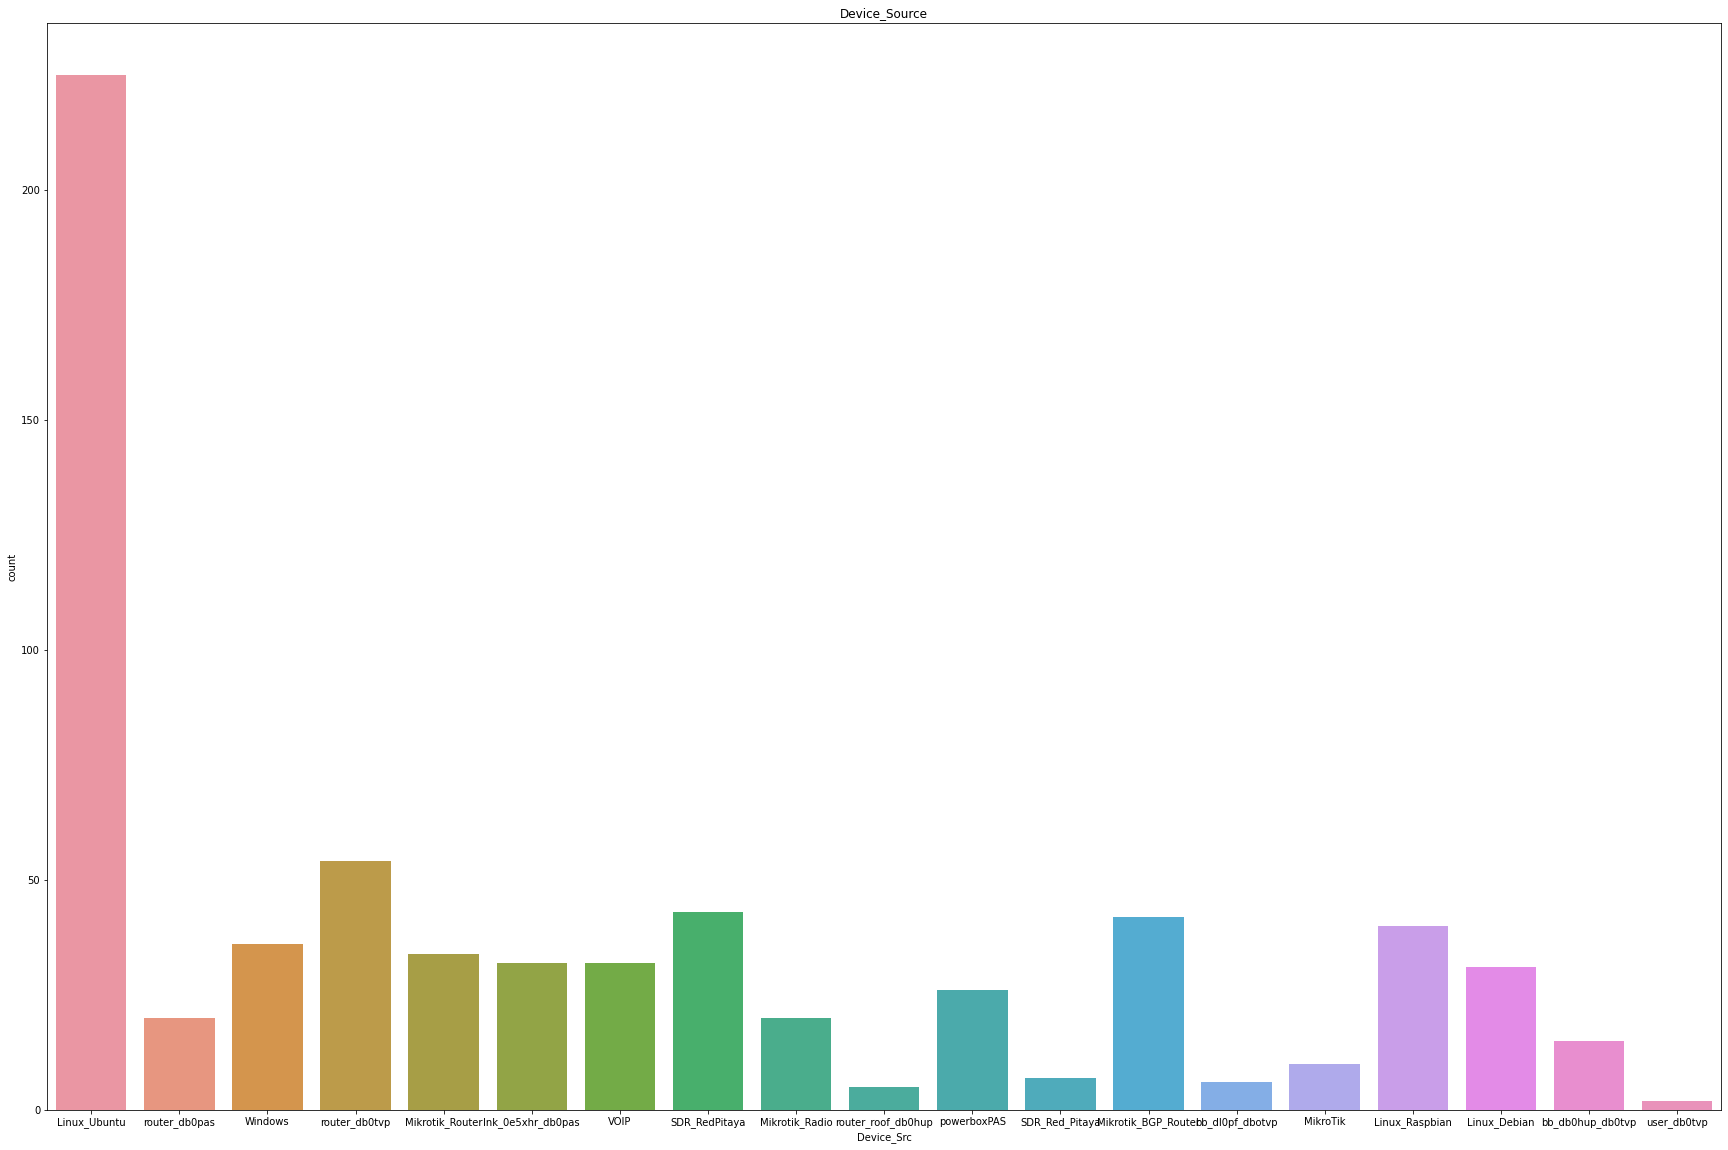

In [ ]:
plt.figure(figsize=(30,20))
plt.title("Device_Source")
sns.countplot(data=new_netflow, x='Device_Src')

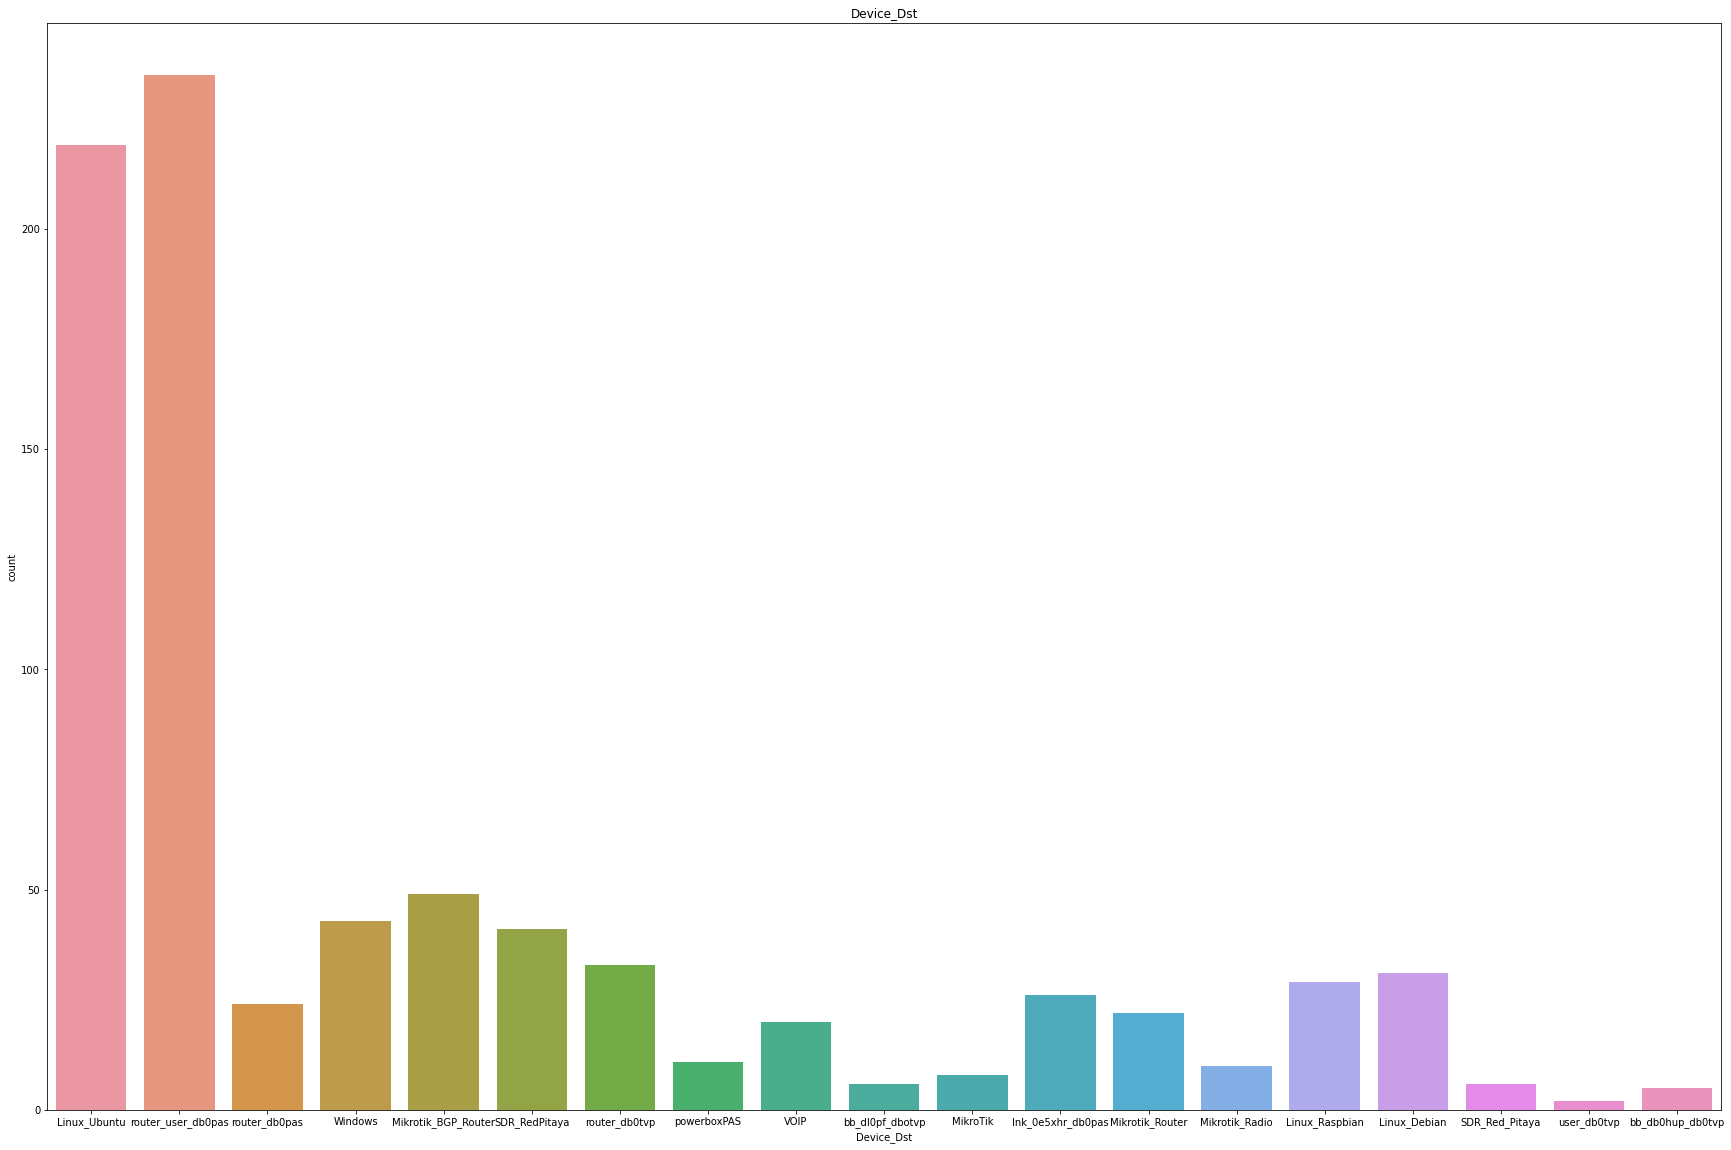

In [ ]:
plt.figure(figsize=(30,20))
plt.title("Device_Dst")
sns.countplot(data=new_netflow, x='Device_Dst')

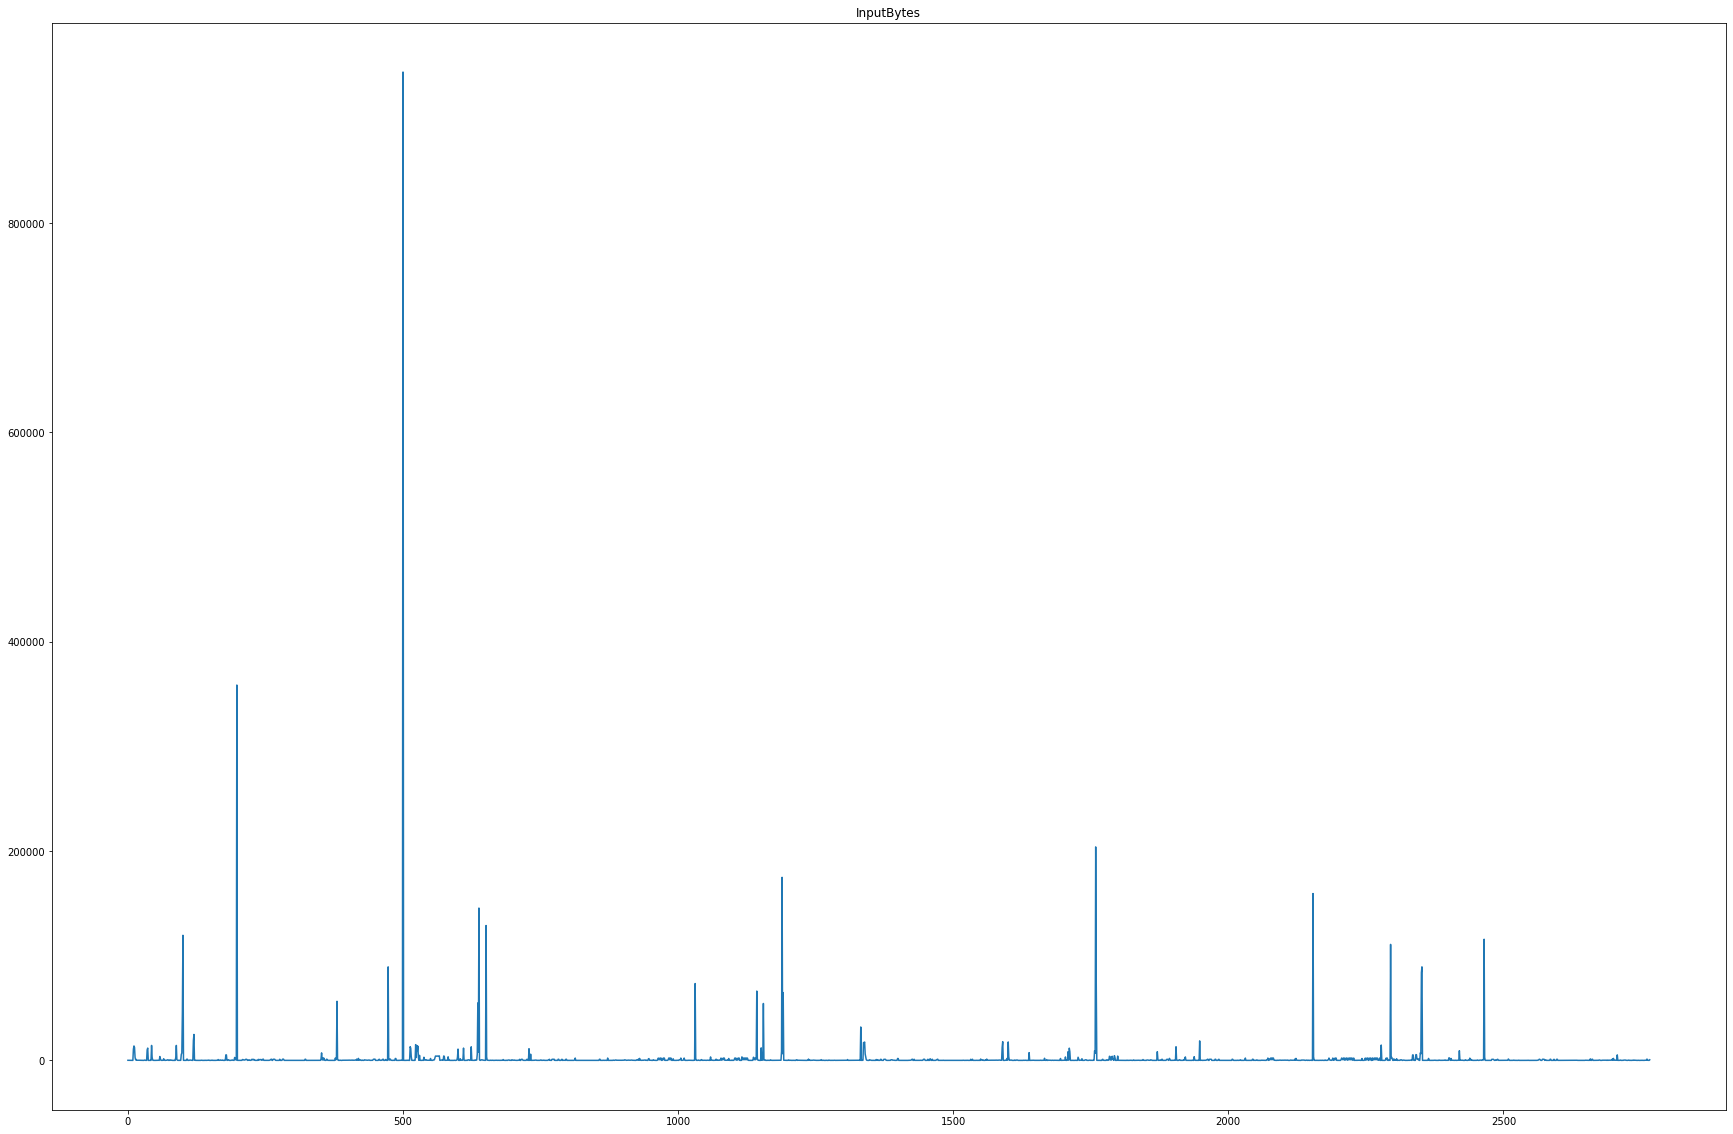

In [ ]:
plt.figure(figsize=(30,20))
plt.title("InputBytes")
plt.plot(new_netflow['ibyt'])

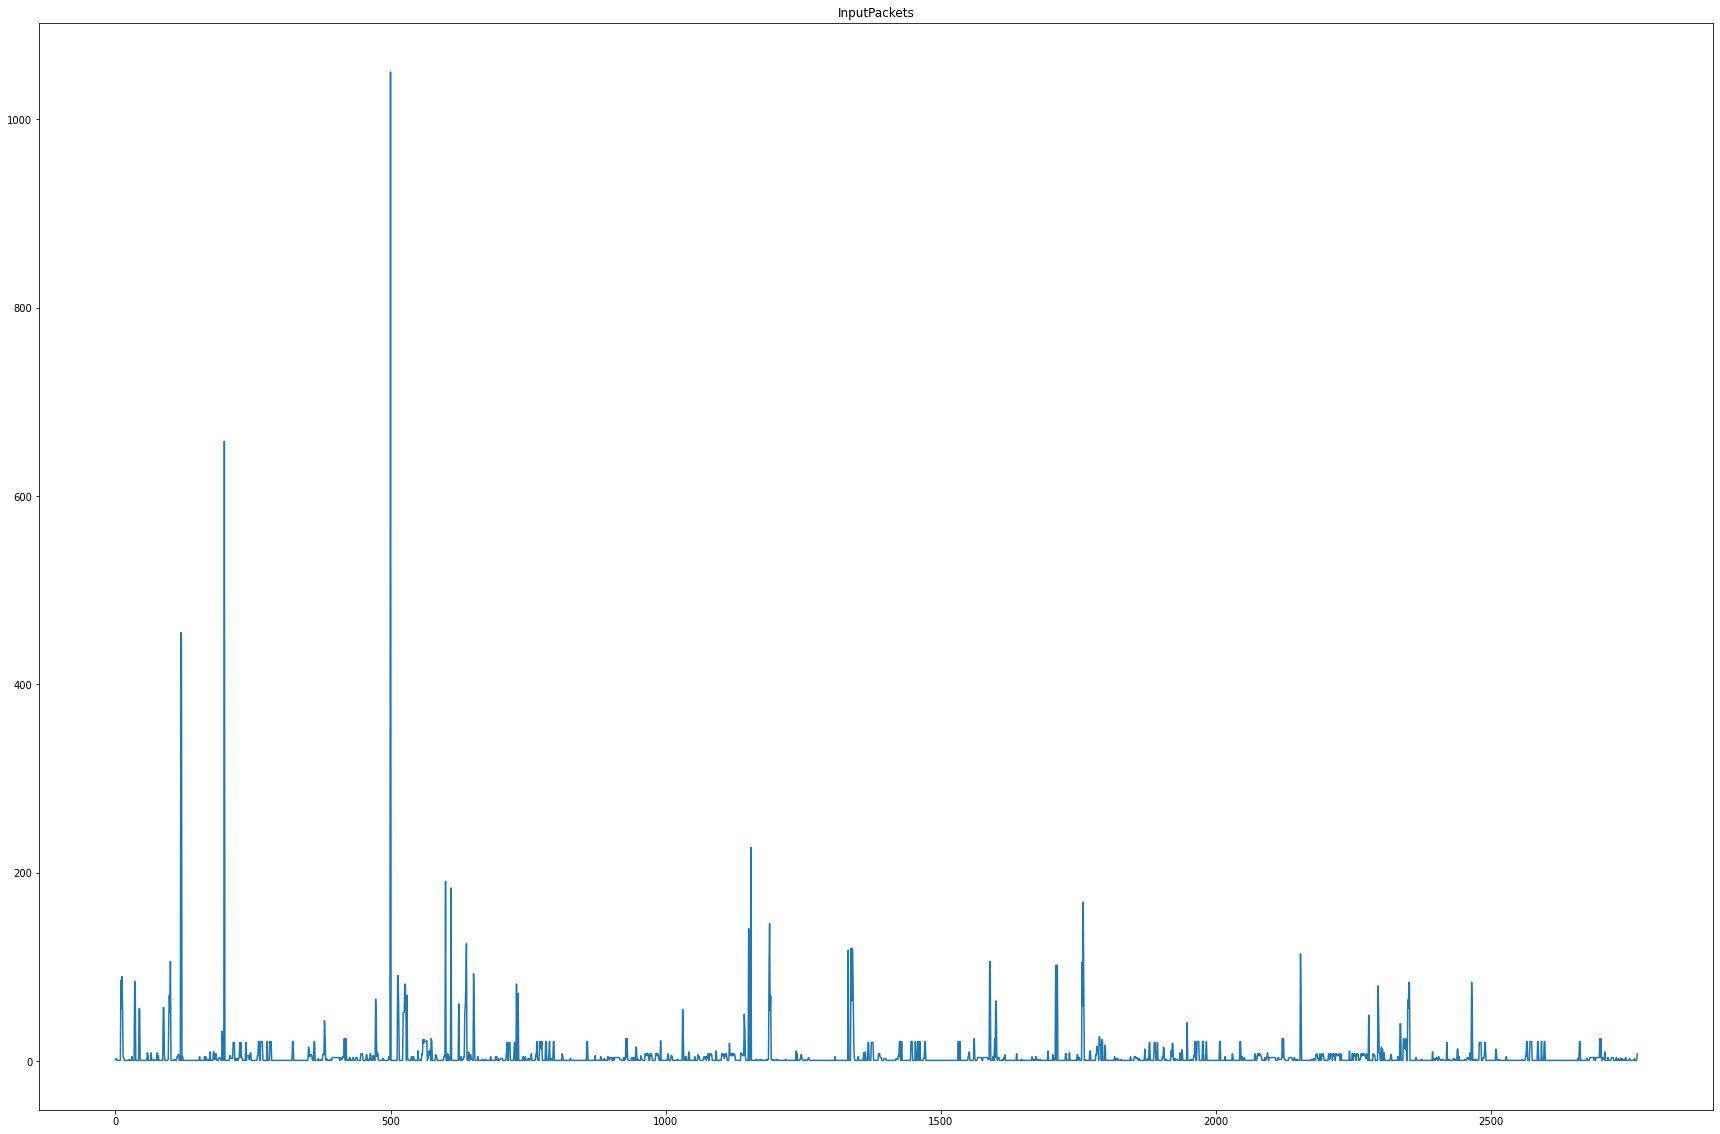

In [ ]:
plt.figure(figsize=(30,20))
plt.title("InputPackets")
plt.plot(new_netflow['ipkt'])

In [ ]:
network_data.groupby(['sa'])['pr'].sum()

sa
0     15
1     15
2     27
3     30
4     15
5     42
6      0
7     15
8     15
9     45
10    81
11    15
12    15
13    15
14     3
15    30
16    24
17    15
18     3
19    54
20     3
21     3
22    12
23    12
24     3
Name: pr, dtype: int64

In [ ]:
new_netflow.head(n=30)

,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Device_Src,Device_Dst
0,44.142.155.95,44.149.16.132,3,2.0,2,2.0,118.0,0.0,0.0,Unknown_Device,Unknown_Device
1,44.142.21.12,44.225.42.182,3,2.0,2,2.0,118.0,0.0,0.0,Unknown_Device,Unknown_Device
2,44.149.20.136,44.149.16.132,2,2.0,2,3.0,177.0,0.0,0.0,Unknown_Device,Unknown_Device
3,44.149.97.133,44.149.43.132,2,2.0,3,1.0,36.0,0.0,0.0,Unknown_Device,Linux_Ubuntu
4,44.149.43.132,44.149.97.133,2,2.0,3,1.0,36.0,0.0,0.0,Linux_Ubuntu,Unknown_Device
5,44.149.16.139,44.225.41.134,2,1.0,2,1.0,60.0,0.0,0.0,Unknown_Device,Unknown_Device
6,44.225.41.134,44.149.16.139,1,2.0,2,1.0,40.0,0.0,0.0,Unknown_Device,Unknown_Device
7,44.148.20.54,255.255.255.255,2,2.0,3,1.0,159.0,0.0,0.0,Unknown_Device,router_user_db0pas
8,44.149.16.139,44.225.41.134,3,2.0,2,1.0,60.0,0.0,0.0,Unknown_Device,Unknown_Device
9,44.225.41.134,44.149.16.139,2,3.0,2,1.0,40.0,0.0,0.0,Unknown_Device,Unknown_Device


In [ ]:
X = network_data.drop(['Device_Src', 'Device_Dst'], axis=1)

In [ ]:
Y = network_data['Device_Src']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape



((123, 9), (53, 9))

In [ ]:
Y_train.shape, Y_test.shape

((123,), (53,))

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,Y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

17.89